In [1]:
library(Seurat)
library(cowplot)
library(scran)

Loading required package: ggplot2
Loading required package: cowplot

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave

Loading required package: Matrix
Loading required package: BiocParallel
Loading required package: SingleCellExperiment
Loading required package: SummarizedExperiment
Loading required package: GenomicRanges
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:Matrix’:

    colMeans, colSums, rowMeans, rowSums, which

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

  

In [2]:
data1_path = './pairwise/t4k.csv'
data2_path = './pairwise/pbmc4k.csv'

In [3]:
setwd("/Users/dariapodorskaja/Bachelor_thesis")


In [4]:
data1 <- read.table('./pairwise/t4k.csv',sep=",", nrows=700)
data2 <- read.table('./pairwise/pbmc4k.csv',sep=",", nrows=700)

In [5]:
raw.all <- cbind(data1, data2)

In [6]:
first.batch <- rep(c(TRUE, FALSE), c(ncol(data1), ncol(data2)))

In [7]:
# Making a plotting function.
plotFUN <- function(fname, Y, subset=NULL, ..., xlab="tSNE 1",ylab="tSNE 2",main="") {
  if (is.null(subset)) {
    subset <- seq_len(nrow(Y))
  }
  # png(fname,width=900,height=700)
  par(mfrow=c(1,1),mar=c(6,6,4,2),cex.axis=2,cex.main=3,cex.lab=2.5)
  plot(Y[,1], Y[,2], cex=0.1,
       pch=ifelse(first.batch, 21, 1)[subset], 
       col=ifelse(first.batch, "black", "red")[subset],
       bg="white", xlab=xlab, ylab=ylab, main=main) 
    # dev.off()
}

In [8]:
batchcolor=c("black","yellow")
plotFUNb <- function(fname, Y, subset=NULL, ...) {
  if (is.null(subset)) {
    subset <- seq_len(nrow(Y))
  }
  png(fname,width=900,height=700)
  par(mfrow=c(1,1),mar=c(6,6,4,2),cex.axis=2,cex.main=3,cex.lab=2.5)
  plot(Y[,1], Y[,2], cex=2,
       pch=ifelse(first.batch, 21, 1)[subset], 
       col=ifelse(first.batch, "black", "yellow")[subset],
       bg="white")#,  xlab="tSNE 1",ylab="tSNE 2")
  dev.off()
    }

In [9]:
t.unc <- t(raw.all)


In [10]:
require(Rtsne)


Loading required package: Rtsne


In [11]:
set.seed(0)

In [12]:
all.dists.unc <- as.matrix(dist(t.unc))

In [13]:
tsne.unc <- Rtsne(all.dists.unc, is_distance=TRUE, perplexity = 10)

In [14]:
pca <- prcomp(t(all.dists.unc))

In [22]:
pca1 <- prcomp(t(raw.all))

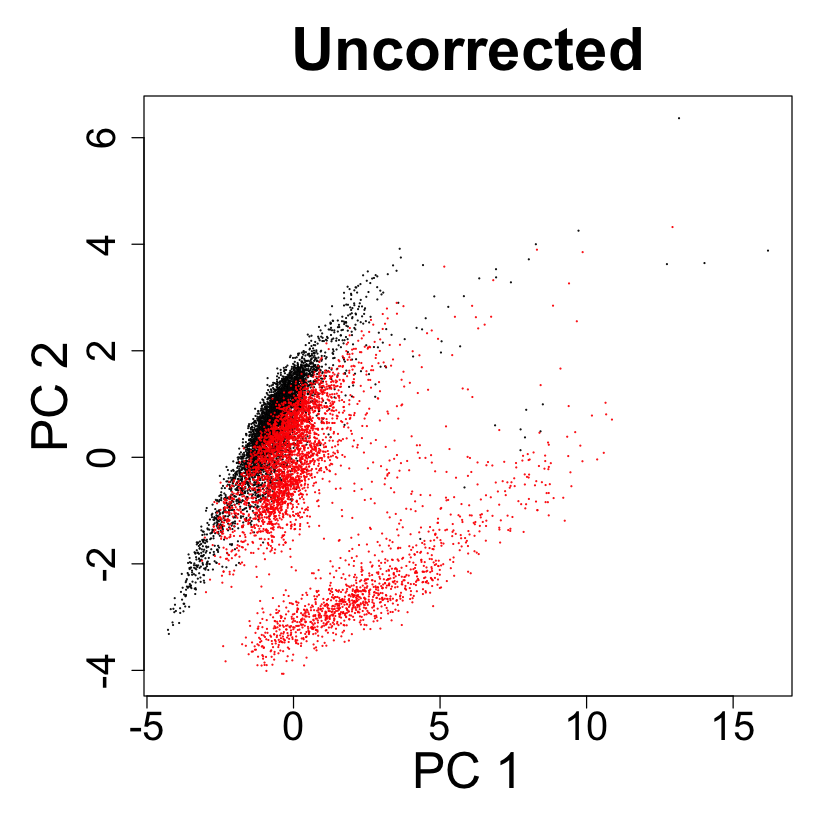

In [25]:
#plot raw data 
plotFUN("results/uncFA.png", pca1$x, main="Uncorrected",  xlab="PC 1",ylab="PC 2")

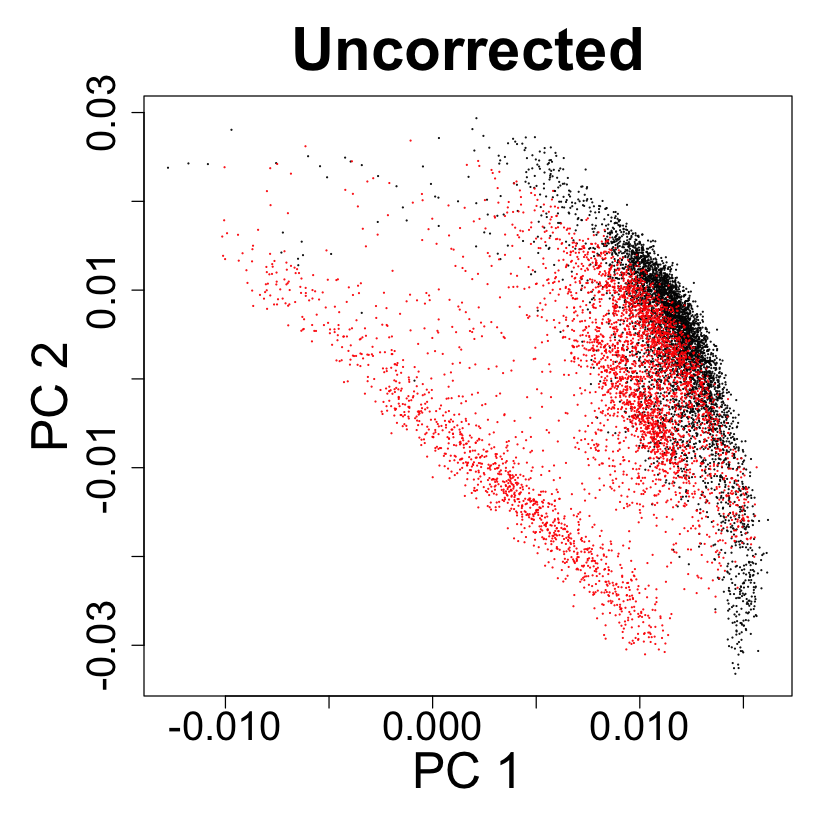

In [15]:
# plot he matrix of variable loadings 
#(i.e., a matrix whose columns contain the eigenvectors). The function princomp returns this in the element loadings.
plotFUN("results/uncFA.png", pca$rotation, main="Uncorrected",  xlab="PC 1",ylab="PC 2")

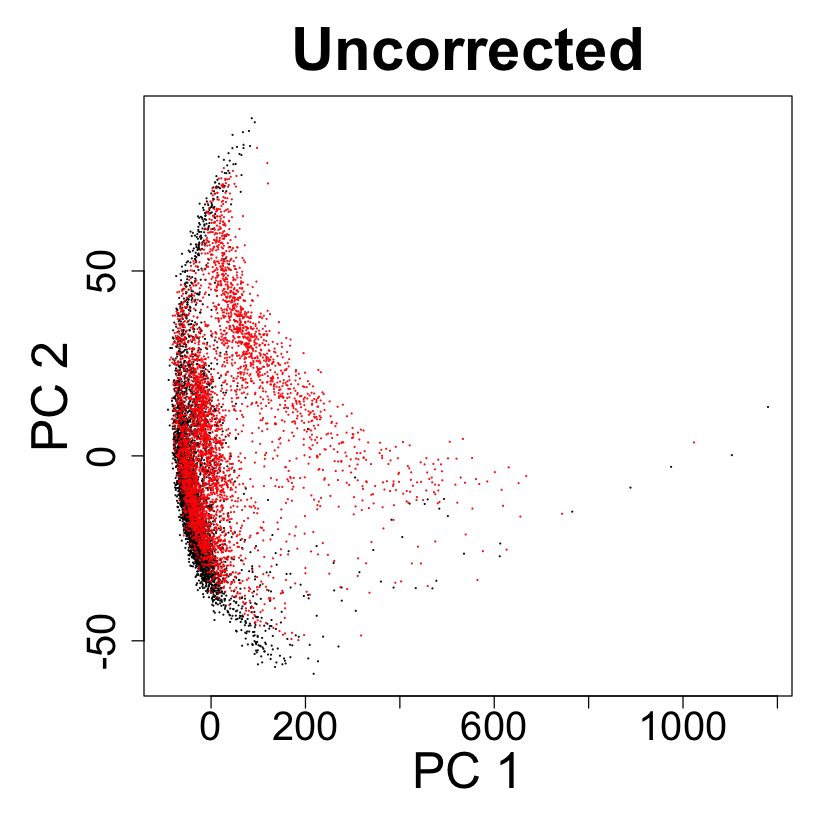

In [27]:
# a numeric or complex matrix (or data frame) which provides the data for the principal components analysis.
plotFUN("results/uncFA.png", pca$x, main="Uncorrected",  xlab="PC 1",ylab="PC 2")

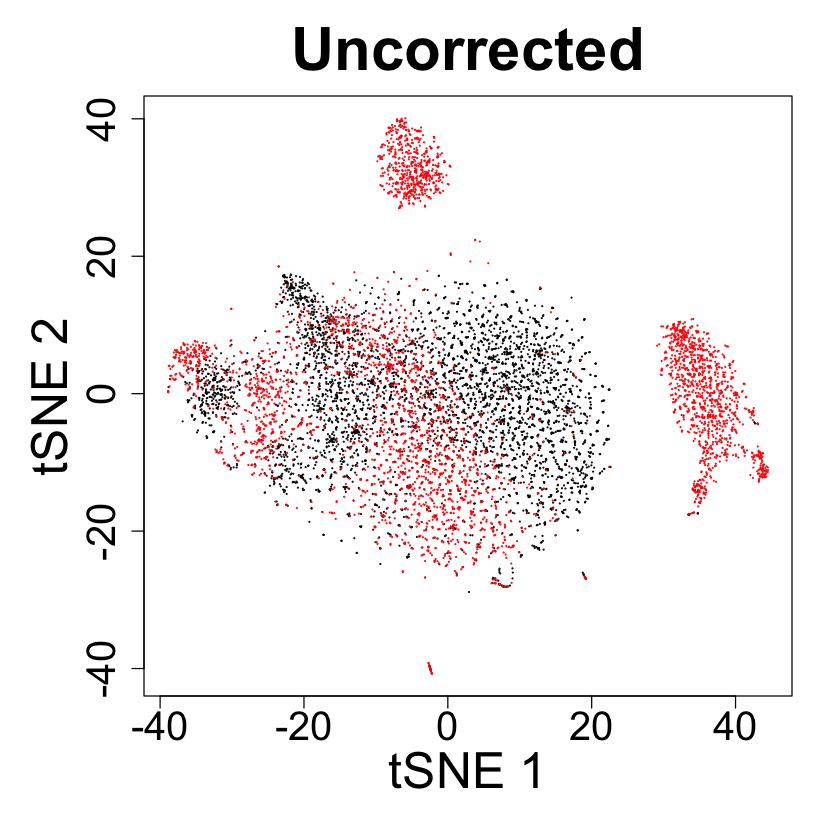

In [28]:
plotFUN("results/uncFA.png", tsne.unc$Y, main="Uncorrected",  xlab="tSNE 1",ylab="tSNE 2")

# Corrected plot

In [32]:
data <- lapply(c(data1_path, data2_path),function(fname){
    X = read.csv(fname,header=F,as.is=T, nrows=700)
})

In [36]:
mnn.out <- mnnCorrect(as.matrix(data[[1]]), as.matrix(data[[2]]), 
                          k=20, sigma=0.1,cos.norm.in=TRUE, cos.norm.out=TRUE, var.adj=TRUE,compute.angle=TRUE) 
# corrected values

In [37]:
X.mnn <- cbind(mnn.out$corrected[[1]], mnn.out$corrected[[2]])
t.mnn <- t(X.mnn)

In [38]:
pca_mnn <- prcomp(t.mnn)

Warning message in title(...):
“conversion failure on 'Сorrected' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in title(...):
“conversion failure on 'Сorrected' in 'mbcsToSbcs': dot substituted for <a1>”

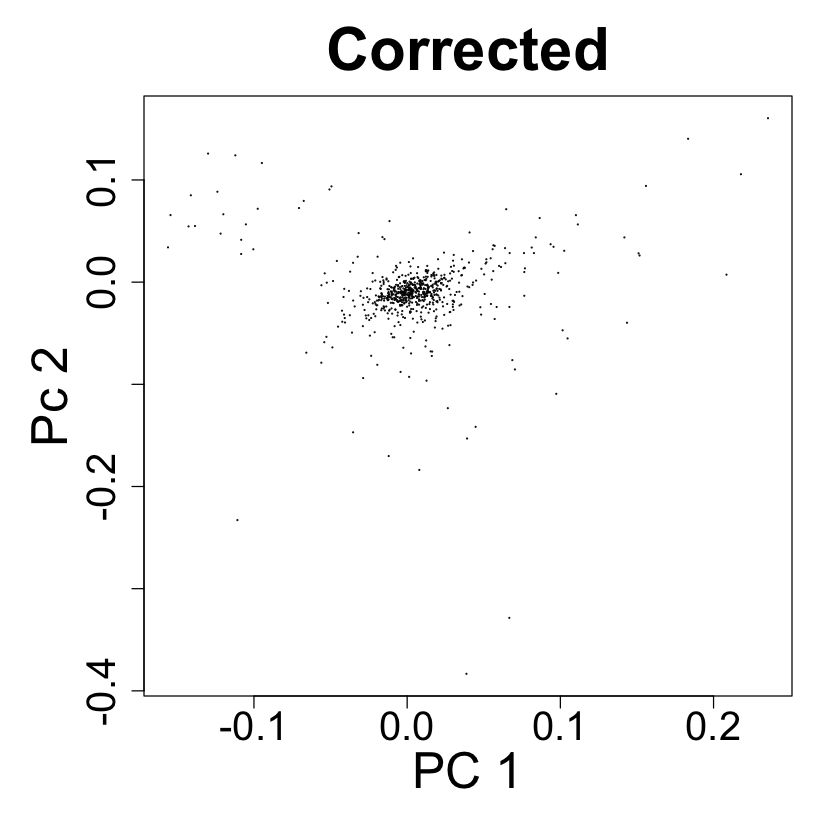

In [39]:
plotFUN("results/uncFA.png", pca_mnn$rotation, main="Сorrected",  xlab="PC 1",ylab="Pc 2")

In [40]:
# Generating a t-SNE plot.
set.seed(0)
all.dists.mnn <- as.matrix(dist(t.mnn))

In [41]:
tsne.mnn <- Rtsne(all.dists.mnn, is_distance=TRUE, perplexity = 90)

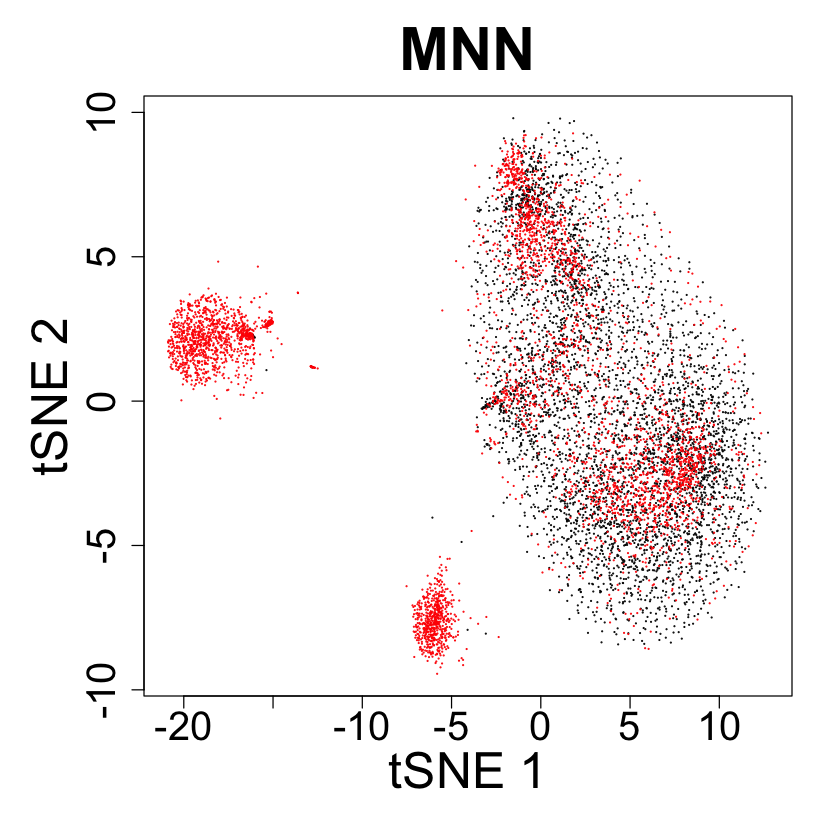

In [42]:
plotFUN("results/mnnFA.png", tsne.mnn$Y, main="MNN",  xlab="tSNE 1",ylab="tSNE 2")

In [43]:
tsne.mnn1 <- Rtsne(all.dists.mnn, is_distance=TRUE, perplexity = 90, reduction.use="pca", dims.use = 1:75)

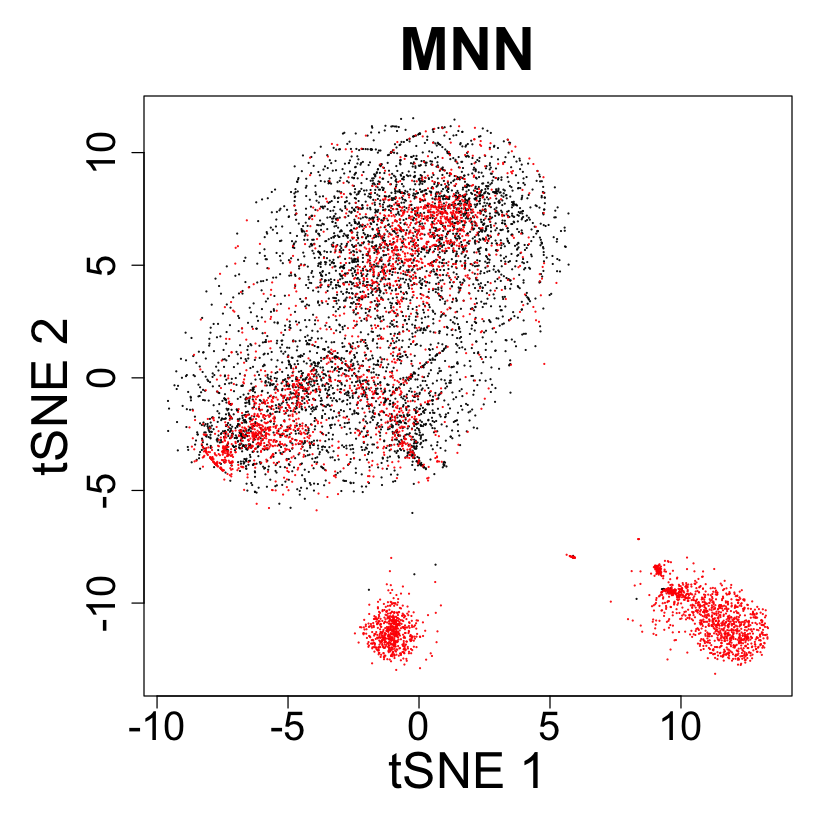

In [44]:
plotFUN("results/mnnFA.png", tsne.mnn1$Y, main="MNN",  xlab="tSNE 1",ylab="tSNE 2")

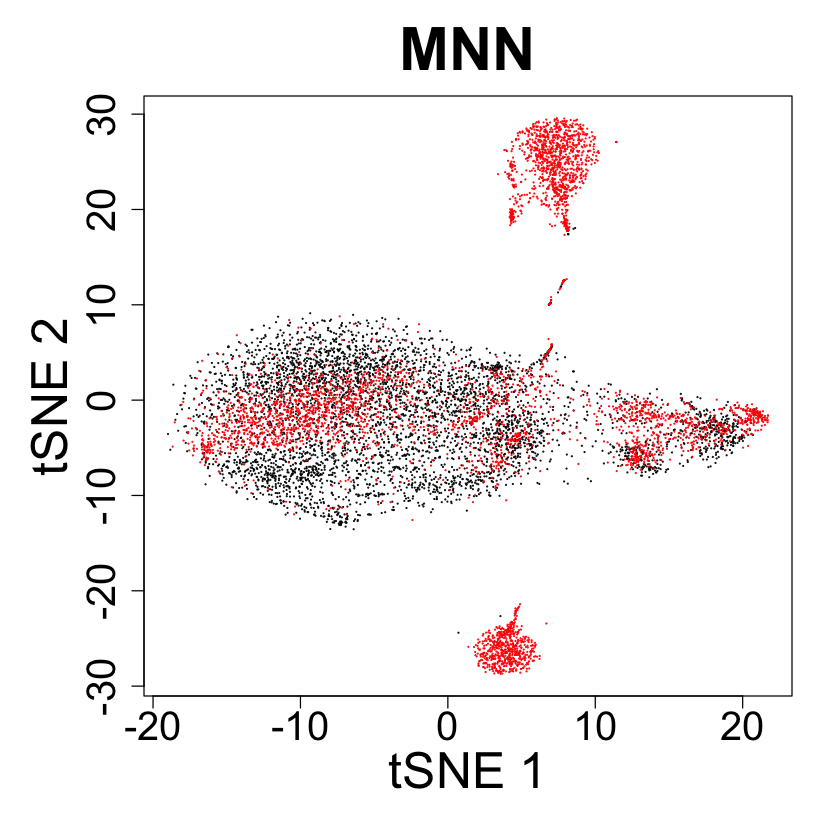

In [45]:
set.seed(0)
tsne.mnn2 <- Rtsne(t.mnn, perplexity = 90, check_duplicates = FALSE)
plotFUN("results/mnnFA_conventsne.png", tsne.mnn2$Y, main="MNN",  xlab="tSNE 1",ylab="tSNE 2")